In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment.


In [4]:
data= pd.read_excel('C:/Users/user/Desktop/iris (1).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.shape

(150, 5)

# Pre-processing steps.

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
a=data[data['SL'].isnull()].index.tolist() # to find index number of missing value 'SL'
print(a)
b=data[data['SW'].isnull()].index.tolist() # to find index number of missing value in "SW"
print(b)
c=data[data['PL'].isnull()].index.tolist() # to find index number of missing value in "PL"
print(c)

[2, 21, 39, 51, 85, 106, 141]
[10, 27, 43, 72, 98, 124]
[28, 42, 56, 94, 109, 147]


In [10]:
d1= data.fillna(value= data.mean()) # This fill the missig value with mean value of the column
d1.isna().sum() 

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Splitting Data into Feature and target

In [11]:
y=d1["Classification"]
X=d1.drop(["Classification",], axis =1) 

# Logical Regression

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(X,y,random_state=2,test_size=.3)

In [13]:
# Create logical regression model
from sklearn.linear_model import LogisticRegression # import logical regression from skl library and create the model
logit_model = LogisticRegression()          # to create an instance of the model
logit_model.fit(X_train, y_train) # to fit the regression model
y_prediction= logit_model.predict(X_test) # to predict y value

In [14]:
#Printing the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is ",accuracy_score(y_test, y_prediction))

Accuracy is  0.9555555555555556


In [15]:
#Printing the confusion matrix of the model
confusion_matrix(y_test, y_prediction)

array([[16,  1,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)

# KNN

In [16]:
# Building Model Using KNN
from sklearn.neighbors import KNeighborsClassifier # Improt library

In [17]:
acc_value=[] # Create an emply list
neighbors=np.arange(3,15) # taking values form 3 to 15 to a list "neighbors"

for k in neighbors: # Create a loop to create kNN for each K value
    classifier= KNeighborsClassifier(n_neighbors=k,metric="minkowski") 
    classifier.fit(X_train,y_train) 
    y_pred=classifier.predict(X_test) 
    acc=accuracy_score(y_test, y_pred)
    acc_value.append(acc) 
acc_value 

[0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556]

Text(0, 0.5, 'Accuracy')

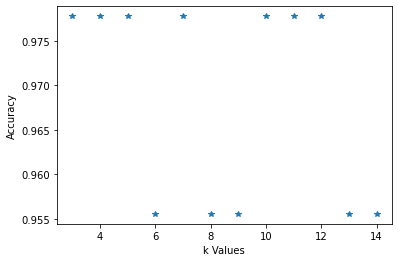

In [18]:
plt.plot(neighbors,acc_value , "*")
plt.xlabel("k Values")
plt.ylabel("Accuracy")

In [19]:
classifier= KNeighborsClassifier(n_neighbors=4,metric="minkowski")
#fitting the model
classifier.fit(X_train,y_train) 
# Predicting the model
y_pred=classifier.predict(X_test) 

In [20]:
#Printing the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is ",accuracy_score(y_test, y_pred))

Accuracy is  0.9777777777777777


In [21]:
confusion_matrix(y_test, y_pred)

array([[16,  1,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]], dtype=int64)

# Random forest algorithm

In [22]:
# Building model Using Random Forest
from sklearn.ensemble import RandomForestClassifier 
rf= RandomForestClassifier() 
#fitting the model
rf.fit(X_train,y_train)
# Predicting the model
y_predi= rf.predict(X_test) 

In [23]:
#Printing the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is ",accuracy_score(y_test, y_predi))

Accuracy is  0.9777777777777777


In [24]:
confusion_matrix(y_test, y_predi)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]], dtype=int64)